# Problem Statement:
1)Analysing Studedent performance data based on various factors such as first test grade, second test grade,how ogten student goes out, number of absent days,relationship with family with rspect to final grade
2)making a prediction of the final test grade using these factors
3)visualizing data for any one of the factors 

# Importing Libraries

In [49]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn import linear_model

# Importing Dataset

In [50]:
# Importing the dataset
dataset = pd.read_csv('/home/baskerv/Desktop/Jupyter/datasets/studentproj.csv')
dataset.head()

,absences,G1,studytime,famrel,goout,G2,G3
0,6,5,2,4,4,6,6
1,4,5,2,5,3,5,6
2,10,7,2,4,2,8,10
3,2,15,3,3,2,14,15
4,4,6,2,4,2,10,10


# Data Analysis

### People Count vs G3 (Final Grade)

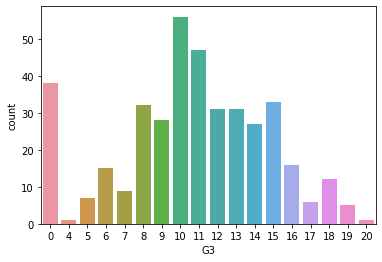

In [51]:
sns.countplot(x="G3",data=dataset)

### G3(Final Grade) vs Study time

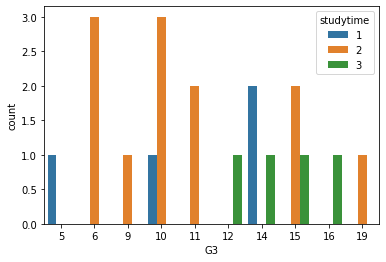

In [52]:
sns.countplot(x="G3",hue="studytime",data=dataset.head(20))

### G3 vs Family Relations

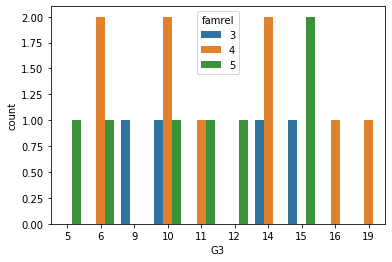

In [53]:
sns.countplot(x="G3",hue="famrel",data=dataset.head(20))

### G3 vs Goout (How often students go out)

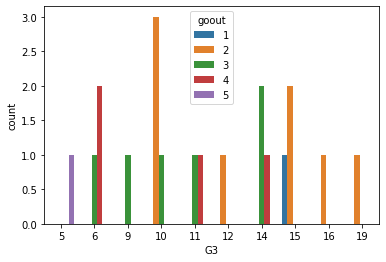

In [54]:
sns.countplot(x="G3",hue="goout",data=dataset.head(20))

### G3 vs G1 (1st exam grades)

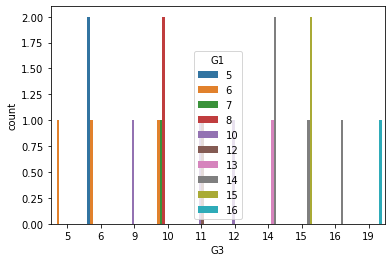

In [56]:
sns.countplot(x="G3",hue="G1",data=dataset.head(20))

### G3 vs G2 (2nd exam grades)

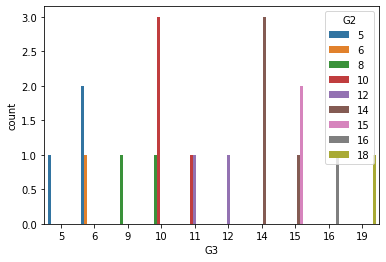

In [57]:
sns.countplot(x="G3",hue="G2",data=dataset.head(20))

# Linear Regression Algorithm for multiple variables

In [89]:
reg=linear_model.LinearRegression()
reg.fit(dataset[['absences','G1','studytime','famrel','G2']],dataset.G3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
reg.coef_

array([ 0.03710574,  0.14829218, -0.16149867,  0.34761997,  0.99952835])

In [91]:
reg.intercept_

-3.1656085658033266

In [92]:
dataset.head()

,absences,G1,studytime,famrel,goout,G2,G3
0,6,5,2,4,4,6,6
1,4,5,2,5,3,5,6
2,10,7,2,4,2,8,10
3,2,15,3,3,2,14,15
4,4,6,2,4,2,10,10


# Prediction of the first G3 value

In [93]:
reg.predict([[6,5,2,4,6]])

array([4.86313937])

# Linear Regression using 1 variable 

In [158]:
x = dataset[["G1"]]
y = dataset[["G3"]]

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =125 ,random_state =0)


In [161]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
regressor.coef_

array([[1.0070074]])

In [165]:
regressor.intercept_

array([-0.36239637])

# Data visualation of Training Data 

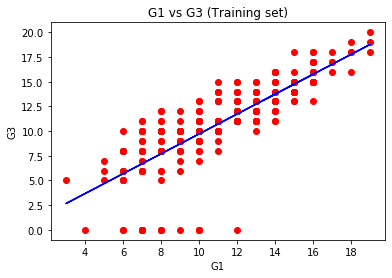

In [162]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('G1 vs G3 (Training set)')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

# Data Visualization of Test Data 

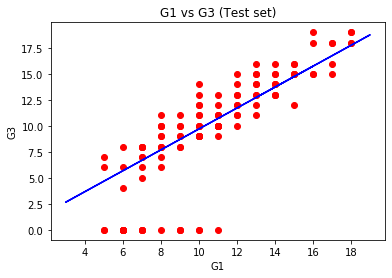

In [163]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('G1 vs G3 (Test set)')
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()